# CO₂ Emissions per Square Kilometer in European Countries
In this notebook we will be plotting a few visualizations for CO2 emissions per square kilometer in European Countries throughout the years from 1970-2023.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Data loading

To begin the project, we explored available databases related to pollution and CO2 emissions. After gathering the data from online sources, we organized it into appropriate folders and integrated it into our code.

In [2]:
data_root = './data/'
data_root_world = './data/cultural/'

In [3]:
# Reading the data
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')

world = gpd.read_file(f'{data_root_world}ne_110m_admin_0_countries.shp')

As the dataset included information on countries worldwide, we decided to narrow our focus to a more manageable scope by analyzing data specifically related to European countries.

In [4]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

We create a dictionary containing the surface area of each country present in the filtered DataFrame, which we then use to add a new column labeled "**Area (km$^2$)**" representing the area of each European country.

An additional dataframe for country areas was not necessary, since the surface area of European countries has remained constant throughout the CO2 emissions dataset timeframe (1970–2023).

In [5]:
# Making a dictionary with the area of each European country present in the dataframe
countries_area = {
    'Albania': 28748,
    'Austria': 83871,
    'Belgium': 30528,
    'Bulgaria': 110879,
    'Bosnia and Herzegovina': 51197,
    'Switzerland': 41285,
    'Cyprus': 9251,
    'Czech Republic': 78866,
    'Germany': 357022,
    'Denmark': 43094,
    'Spain' : 505978,
    'Estonia': 45340,
    'Finland': 338470, 
    'France': 549087,
    'United Kingdom': 243610,
    'Greece': 131960,
    'Croatia': 88070,
    'Hungary': 93030,
    'Ireland': 70280,
    'Iceland': 103000,
    'Italy': 302070,
    'Lithuania': 65286,
    'Luxembourg': 2590,
    'Latvia': 64590,
    'North Macedonia': 25710,
    'Malta': 320,
    'Netherlands': 41540,
    'Norway': 624500,
    'Poland': 312720,
    'Portugal': 92230, 
    'Romania': 238400,
    'Serbia and Montenegro': 98800,
    'Slovakia': 49030,
    'Slovenia': 20480,
    'Sweden': 528860,
    'Russia': 17098250,
    'Ukraine': 603550,
    'Belarus': 207630,
    'Moldova': 33850
}

In [6]:
df_co2_europe['Area'] = df_co2_europe['Name'].map(countries_area)

name_index = df_co2_europe.columns.get_loc('Name')
df_co2_europe.insert(name_index + 1, 'Area (km²)', df_co2_europe.pop('Area'))
df_co2_europe.head(3)

,Region,Country_code,Name,Area (km²),Substance,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5,Central Europe,ALB,Albania,28748,CO2,4844.988068,4838.128768,5518.291373,4951.942493,5329.617357,...,5095.835784,4863.525143,4530.278883,5341.515428,5305.582509,4953.544001,4560.776421,5039.333111,4609.009805,4591.827764
13,OECD_Europe,AUT,Austria,83871,CO2,52967.212730,55633.250310,57846.137900,61156.048380,58667.612290,...,65929.043300,67369.130490,67782.517710,70106.334730,67186.843150,68533.245150,62599.758260,66175.326520,61223.713120,58815.133020
16,OECD_Europe,BEL,Belgium,30528,CO2,139256.731700,129138.899500,140747.585600,146145.763900,144977.682500,...,97724.460430,102379.091800,101260.961700,99700.387510,100098.117700,99882.484110,92267.020120,96251.006090,89739.264640,84306.064580


The data has now been fully filtered, containing the total CO2 emissions for each country from 1970 to 2023 alongside their surface area. This allows us to begin visualizations to explore which countries have the highest emissions relative to their land size.

### Visualizations

Although the total CO2 emissions per country are already visualized in the notebook **"CO2_emissions_by_country.ipynb"**, we will create that visualization here as well for easier comparison.

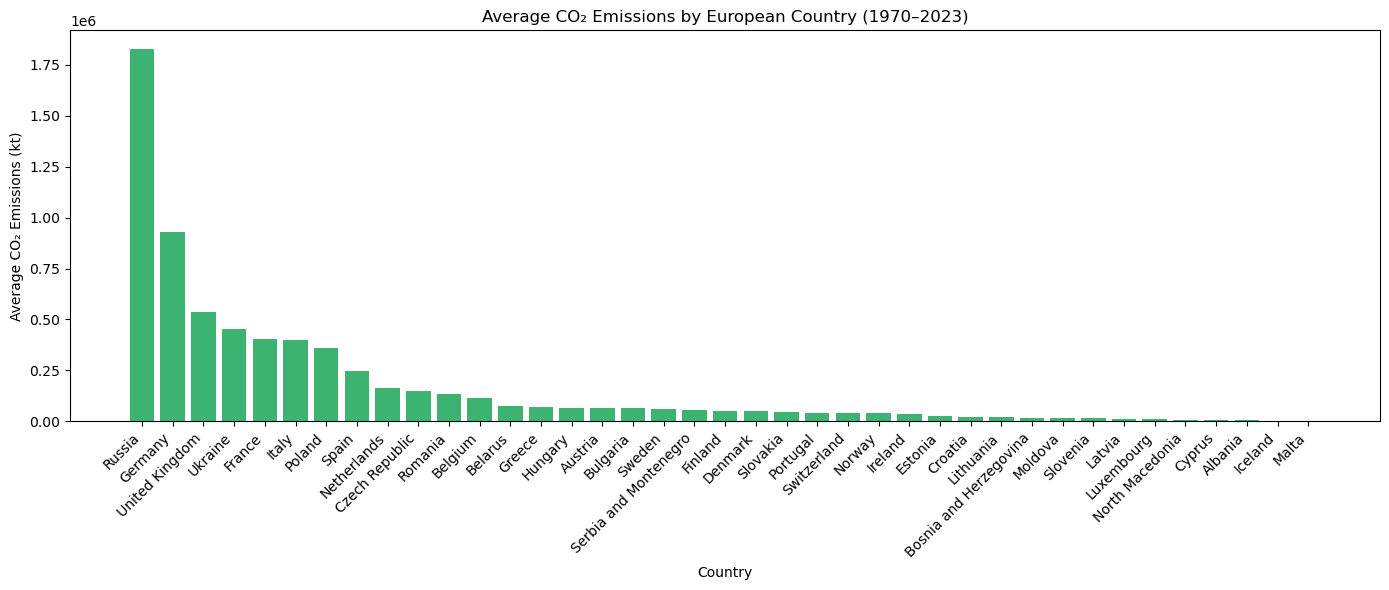

In [7]:
years = [str(y) for y in range(1970, 2024)]

df_avg = df_co2_europe.copy()
df_avg["Average_CO2"] = df_avg[years].mean(axis=1)

df_avg_sorted = df_avg.sort_values(by="Average_CO2", ascending=False)

df_avg_sorted = df_avg_sorted[["Name", "Average_CO2"]].reset_index(drop=True)

# Plotting the results
plt.figure(figsize=(14, 6))
plt.bar(df_avg_sorted["Name"], df_avg_sorted["Average_CO2"], color='mediumseagreen')
plt.ylabel("Average CO₂ Emissions (kt)")
plt.xlabel("Country")
plt.title("Average CO₂ Emissions by European Country (1970–2023)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
df_avg_sorted.head(15)

,Name,Average_CO2
0,Russia,1.826988e+06
1,Germany,9.285034e+05
2,United Kingdom,5.369989e+05
3,Ukraine,4.556760e+05
4,France,4.026492e+05
5,Italy,3.969357e+05
6,Poland,3.590356e+05
7,Spain,2.496867e+05
8,Netherlands,1.627432e+05
9,Czech Republic,1.477531e+05


From the plot we can see that the top countries by total emissions are the bigger ones - seen from their surface area, such as:
 * Russia
 * Gremany
 * United Kingdom
 * Ukraine etc.

In [9]:
df_co2_density = df_co2_europe.copy()

# For each year column (from 1970 to 2023), divide by the area
for year in years:
    df_co2_density[year] = df_co2_density[year] / df_co2_density["Area (km²)"]

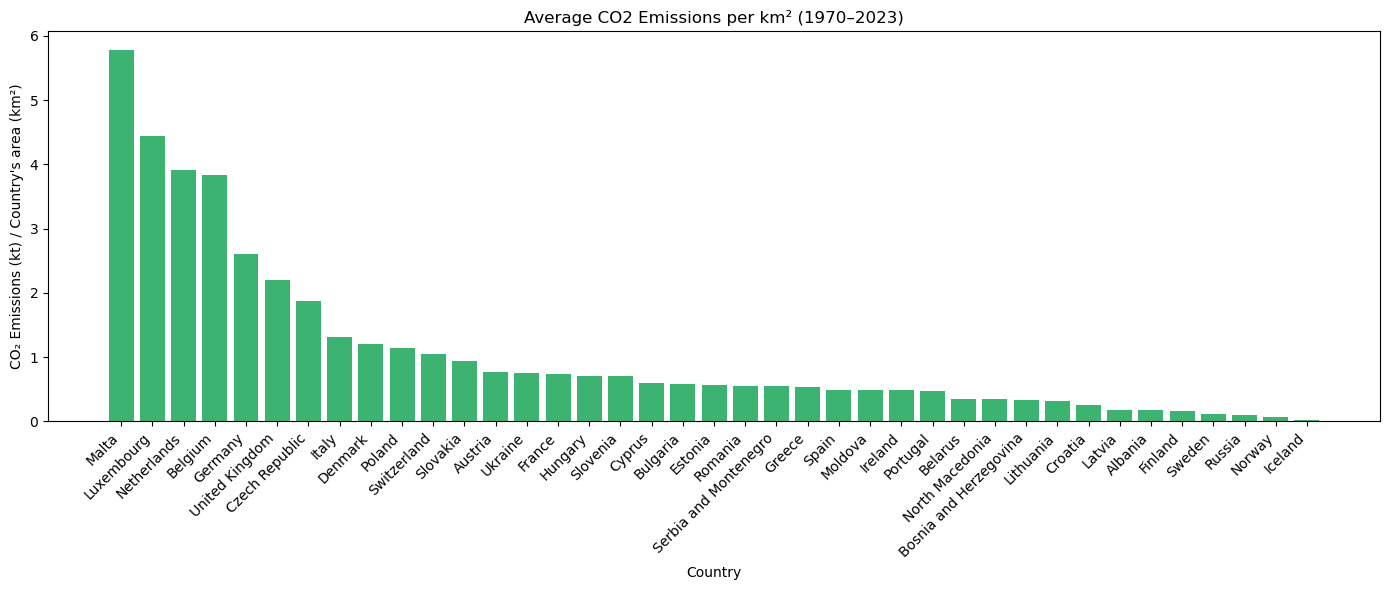

In [10]:
# Calculate average across those years for each country
df_co2_density['avg_co2'] = df_co2_density[years].mean(axis=1)

# Sorting the countries by average CO2 emissions (descending) and getting the top 10 countries
df_co2_density = df_co2_density.sort_values(by='avg_co2', ascending=False)

# Plotting the results
plt.figure(figsize=(14, 6))
plt.bar(df_co2_density["Name"], df_co2_density["avg_co2"], color='mediumseagreen')
plt.ylabel("CO₂ Emissions (kt) / Country's area (km²)")
plt.xlabel("Country")
plt.title("Average CO2 Emissions per km² (1970–2023)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot of average CO2 emissions per km² highlights that smaller countries like Malta, Luxembourg, and the Netherlands appear as the most polluting when emissions are normalized by area.However, this result can be misleading. Because these countries have relatively small land areas, even moderate total emissions translate into high emission densities. This means the metric disproportionately favors smaller countries and does not necessarily reflect higher total pollution or environmental impact. 

Therefore, while useful for some analyses, CO2 emissions per unit area should be interpreted carefully and complemented with other measures such as total emissions (done in the **"CO2_emissions_by_country.ipynb"** notebook) or per capita emissions (done in the "**CO2_emissions_by_population.ipynb**" notebook to get a more balanced view of a country’s environmental footprint.

A map visualization enhances the clarity of the results. As expected, smaller countries are likely to appear in red or dark red shades due to their higher CO₂ emissions density.

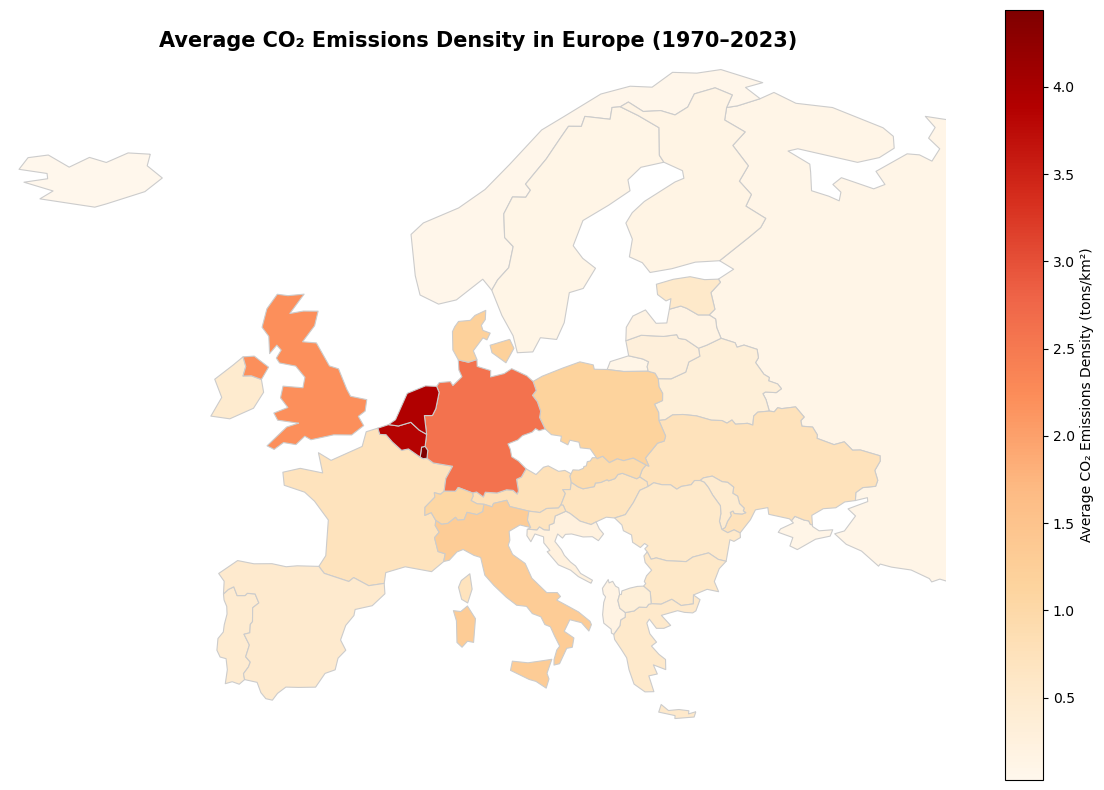

In [11]:
df_co2_density['Name'] = df_co2_density['Name'].replace('Czhech Republic', 'Czechia')
df_co2_density['Name'] = df_co2_density['Name'].str.strip()
world['NAME'] = world['NAME'].str.strip()

# Merge by country names
map_df = world.merge(df_co2_density, left_on='NAME', right_on='Name', how='inner')

# Filter for Europe
map_df = map_df[map_df['CONTINENT'] == 'Europe']

# Set bounds for Europe to exclude distant territories
minx, miny, maxx, maxy = -25, 34, 45, 72

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# fig.patch.set_facecolor('#121212')   # dark background
# ax.set_facecolor('#121212')  
map_df.plot(
    column='avg_co2',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    legend_kwds={'label': "Average CO₂ Emissions Density (tons/km²)"}
)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title('Average CO₂ Emissions Density in Europe (1970–2023)', fontsize=15, weight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

The map visualization clearly shows disappointing results, with the smallest European countries appearing as the most polluting.

Notably, Serbia and Montenegro are missing from the map because, in the dataset we have for CO2 emissions per country, they are combined as a single entry ("Serbia and Montenegro"). Additionally, although Malta ranks highest in CO₂ emissions per square kilometer, it does not appear on the map since it is not included in the world dataframe.